# Project 3 :  Monthly Sales Trends and Analysis 

In [5]:
import pandas as pd
import matplotlib.pyplot as plt

In [21]:
df = pd.read_csv('cleaned_data.csv', encoding='iso-8859-1')
monthly_sales = df.groupby('MonthYear')['Revenue'].sum().reset_index()
print(df.info())

C:\Users\jayrg\AppData\Local\Temp\ipykernel_2484\2991597300.py:1: DtypeWarning: Columns (1,2,4,7,12,13) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('cleaned_data.csv', encoding='iso-8859-1')


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 388769 entries, 0 to 388768
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   InvoiceNo       99999 non-null  float64
 1   StockCode       99999 non-null  object 
 2   Description     99999 non-null  object 
 3   Quantity        99999 non-null  float64
 4   InvoiceDate     99999 non-null  object 
 5   UnitPrice       99999 non-null  float64
 6   CustomerID      99999 non-null  float64
 7   Country         99999 non-null  object 
 8   Revenue         99999 non-null  float64
 9   InvoiceYear     99999 non-null  float64
 10  InvoiceMonth    99999 non-null  float64
 11  InvoiceDay      99999 non-null  float64
 12  InvoiceWeekday  99999 non-null  object 
 13  MonthYear       99999 non-null  object 
dtypes: float64(8), object(6)
memory usage: 41.5+ MB
None


## Monthly Sales Trends

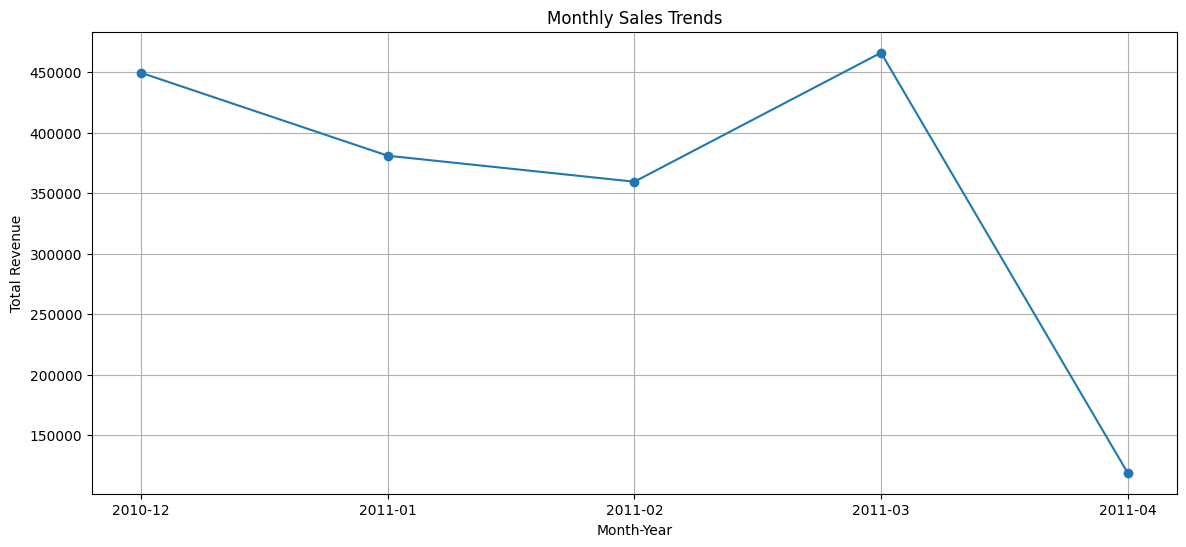

In [7]:
monthly_sales = monthly_sales.sort_values(by='MonthYear')
plt.figure(figsize=(14,6))
plt.plot(monthly_sales['MonthYear'].astype(str),monthly_sales['Revenue'], marker='o', linestyle='-')
plt.title('Monthly Sales Trends')
plt.xlabel('Month-Year')
plt.ylabel('Total Revenue')
plt.grid(True)
plt.show()

## Analyse Year Sales Performance

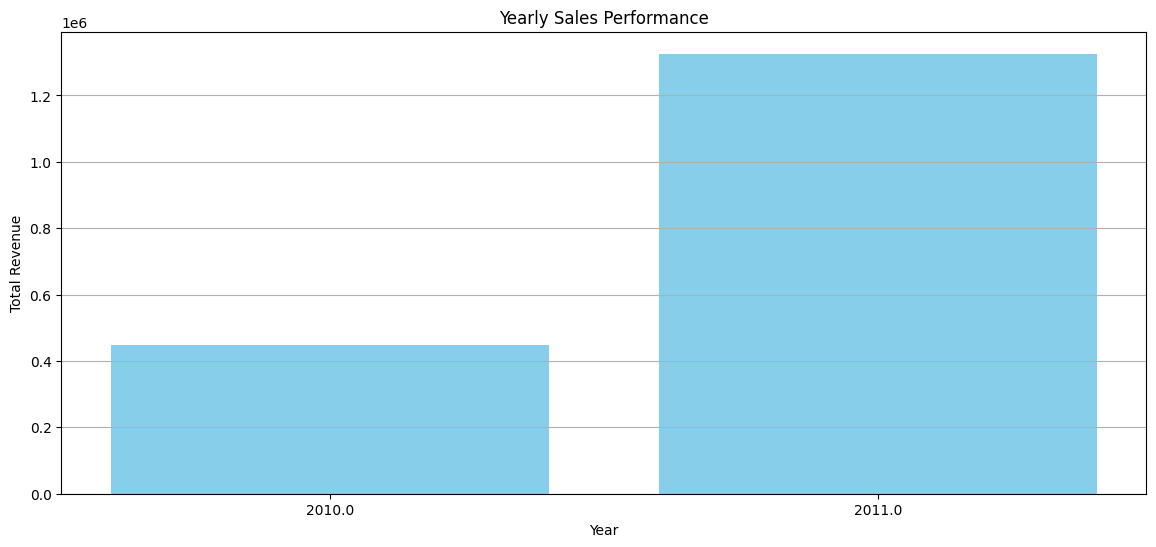

In [8]:
yearly_sales = df.groupby('InvoiceYear')['Revenue'].sum().reset_index()
plt.figure(figsize=(14,6))
plt.bar(yearly_sales['InvoiceYear'].astype(str), yearly_sales['Revenue'], color='skyblue')
plt.title('Yearly Sales Performance')
plt.xlabel('Year')
plt.ylabel('Total Revenue')
plt.grid(axis='y')
plt.show()

### 

## Compare Peak and Low Sales Periods

In [9]:
best_month = monthly_sales.loc[monthly_sales['Revenue'].idxmax()]
worst_month = monthly_sales.loc[monthly_sales['Revenue'].idxmin()]

print(f"Best Month: {best_month['MonthYear']} with Revenue: {best_month['Revenue']}")
print(f"Worst Month: {worst_month['MonthYear']} with Revenue: {worst_month['Revenue']}")

Best Month: 2011-03 with Revenue: 466108.12
Worst Month: 2011-04 with Revenue: 118959.48


## Geographic Sales Performance

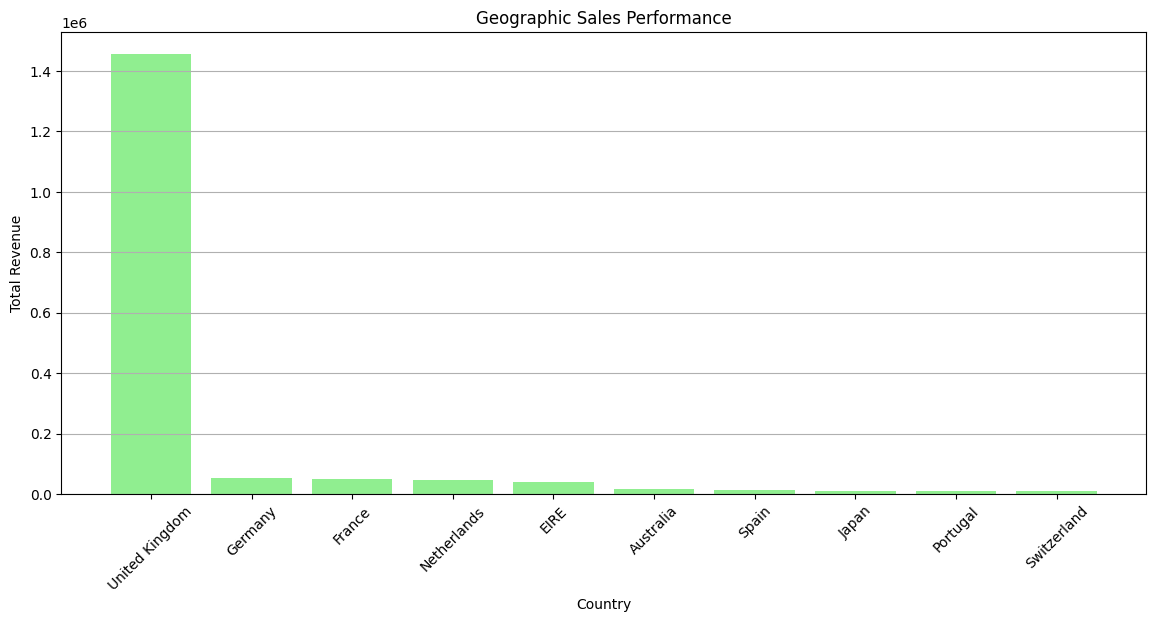

In [10]:
country_sales = df.groupby('Country')['Revenue'].sum().reset_index()
country_sales = country_sales.sort_values(by='Revenue', ascending=False)
plt.figure(figsize=(14,6))
top_country = country_sales.head(10)
plt.bar(top_country['Country'], top_country['Revenue'], color='lightgreen')
plt.title('Geographic Sales Performance')
plt.xlabel('Country')
plt.ylabel('Total Revenue')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.show()

## Top 10 Best-Selling Products by Quantity

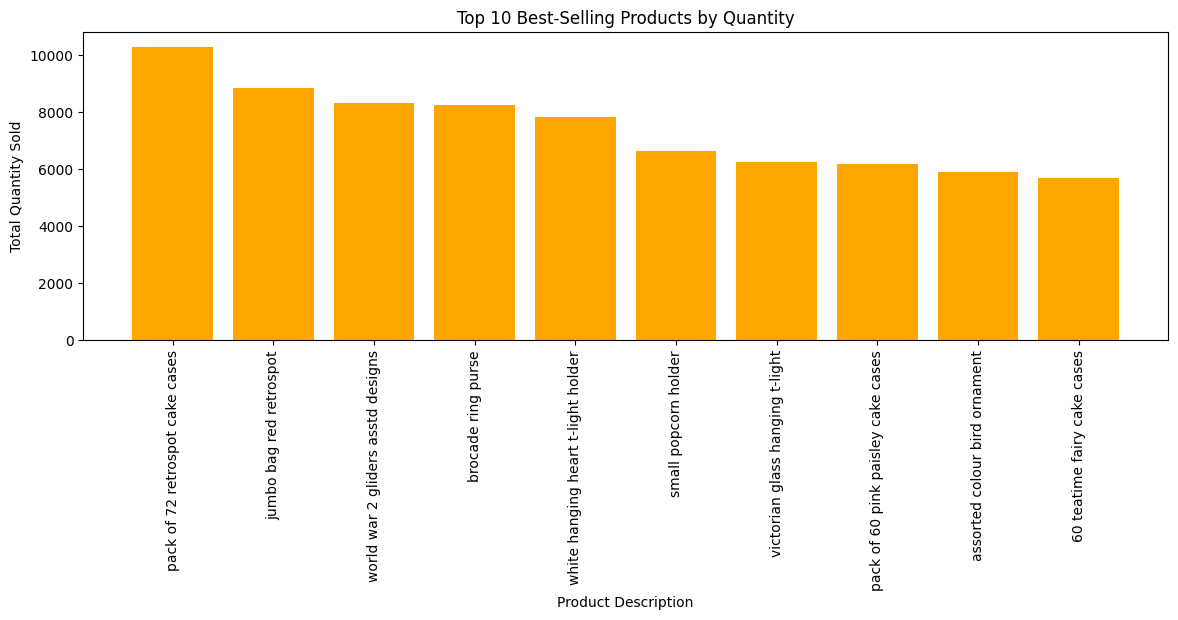

In [12]:
saleByQty = df.groupby('Description')['Quantity'].sum().reset_index()
saleByQty = saleByQty.sort_values(by='Quantity', ascending=False)
top_products = saleByQty.head(10)
plt.figure(figsize=(14,4))
plt.bar(top_products['Description'], top_products['Quantity'], color='orange')
plt.title('Top 10 Best-Selling Products by Quantity')
plt.xlabel('Product Description')
plt.ylabel('Total Quantity Sold')
plt.xticks(rotation=90)
plt.show()

## Top 10 Products by Revenue

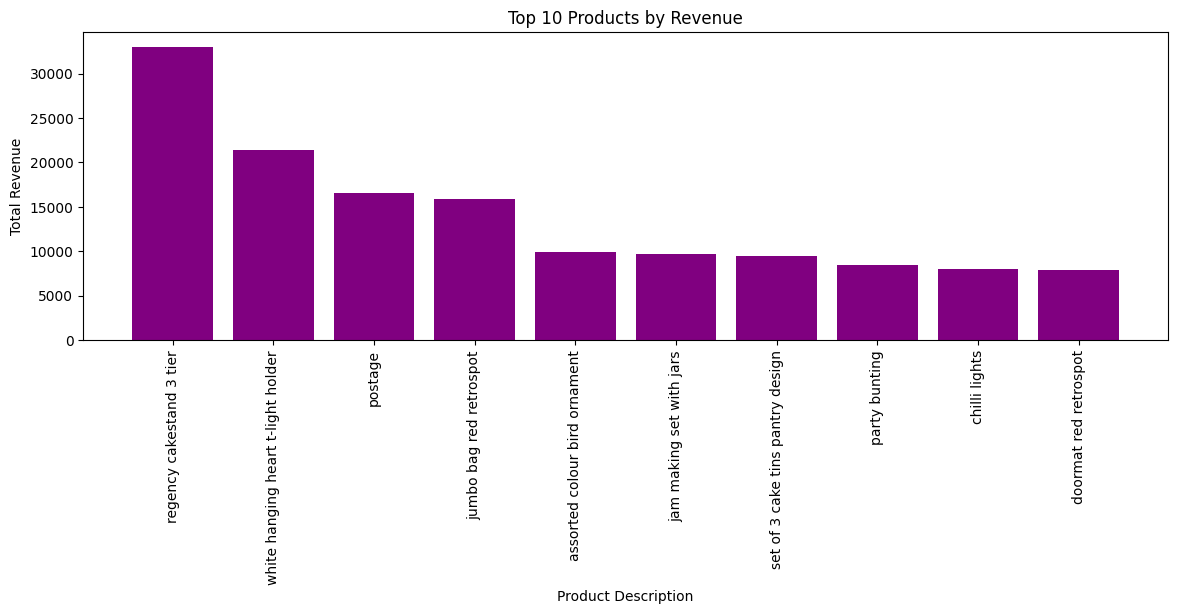

In [16]:
top_products = df.groupby('Description')['Revenue'].sum().reset_index()
top_products = top_products.sort_values(by='Revenue', ascending=False)
top_products = top_products.head(10)
plt.figure(figsize=(14,4))
plt.bar(top_products['Description'], top_products['Revenue'], color='purple')
plt.title('Top 10 Products by Revenue')
plt.xlabel('Product Description')
plt.ylabel('Total Revenue')
plt.xticks(rotation=90)
plt.show()

## Revenue by Weekday

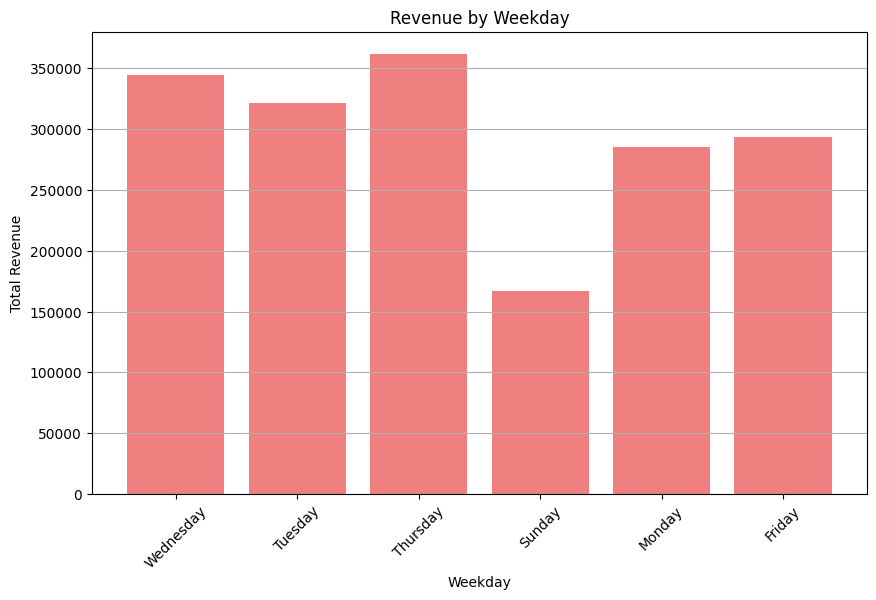

In [18]:
weekday_sales = df.groupby('InvoiceWeekday')['Revenue'].sum().reset_index()
weekday_sales = weekday_sales.sort_values(by='InvoiceWeekday', ascending=False)
plt.figure(figsize=(10,6))
plt.bar(weekday_sales['InvoiceWeekday'], weekday_sales['Revenue'], color='lightcoral')
plt.title('Revenue by Weekday')
plt.xlabel('Weekday')
plt.ylabel('Total Revenue')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.show()